<a href="https://colab.research.google.com/github/irfannhkm/PCVK_GANJIL_24-25/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 10 – Thresholding, Segmentasi Sederhana

||
|----------------|--------------------------|
|Nama:|Muhammad Irfan Nur Hakim |
|Kelas:|TI-3F  |
|NIM:|2241620230|
|Absen:|`15`|


<h3 align="left">Connect with me:</h3>
<p align="left">
<a href="https://github.com/irfannhkm/PCVK_GANJIL_24-25" target="blank"><img align="center" src="https://raw.githubusercontent.com/rahuldkjain/github-profile-readme-generator/master/src/images/icons/Social/github.svg" alt="irfan.nhkm" height="30" width="40" /></a>

[LINK GITHUB](https://github.com/irfannhkm/PCVK_GANJIL_24-25)

[LINK GOOGLE COLAB](https://colab.research.google.com/drive/1zOQd7ssymViTwkUZ5NIH-ufcX_8EcnbD?usp=sharing)

### 1. Buka Google Colab, kemudian import folder yang ada di Drive Anda.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-10 berikut.

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

### 3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.

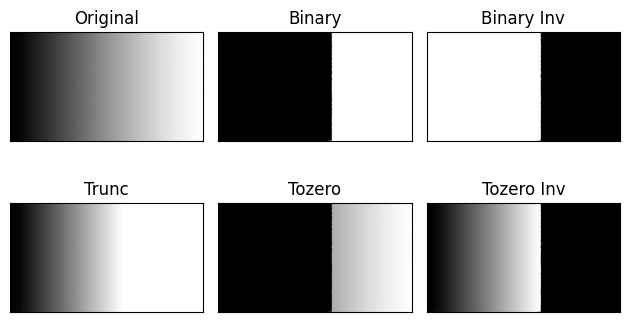

In [4]:
img = cv2.imread('/content/drive/MyDrive/PCVK/gradient.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

threshold = 170

binary = np.where(img > threshold, 255, 0).astype(np.uint8)
binary_inv = np.where(img > threshold, 0, 255).astype(np.uint8)
trunc = np.where(img > threshold, threshold, img).astype(np.uint8)
tozero = np.where(img > threshold, img, 0).astype(np.uint8)
tozero_inv = np.where(img > threshold, 0, img).astype(np.uint8)

# tampilkan hasil
tittle = ['Original', 'Binary', 'Binary Inv', 'Trunc', 'Tozero', 'Tozero Inv']
img_list = [img, binary, binary_inv, trunc, tozero, tozero_inv]

for i in range(len(tittle)):
    plt.subplot(2, 3, i+1)
    plt.imshow(img_list[i], cmap='gray')
    plt.title(tittle[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()


### 4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

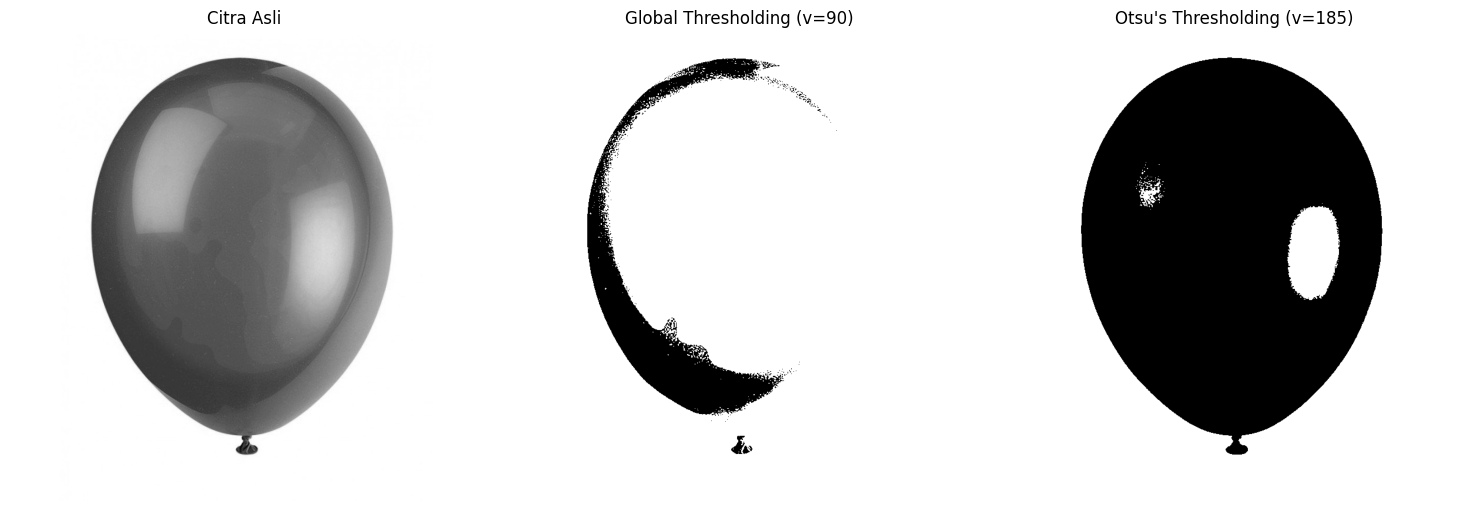

In [5]:
# Load image
img = cv2.imread('/content/drive/MyDrive/PCVK/balloon.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Global thresholding dengan nilai fixed threshold yaitu 90
global_threshold_value = 90
global_threshold = np.where(img > global_threshold_value, 255, 0).astype(np.uint8)

# Menghitung histogram
hist, bins = np.histogram(img.ravel(), 256, [0, 256])

# Jumlah nilai pixels
total = img.shape[0] * img.shape[1]

# Variables untuk metode Otsu's
sum_total = np.dot(np.arange(256), hist)  # total sum for mean calculation
sumB, weightB, max_variance, threshold = 0, 0, 0, 0

# Algoritma Otsu untuk menemukan optimal threshold
for t in range(256):
    weightB += hist[t]
    if weightB == 0:
        continue

    weightF = total - weightB
    if weightF == 0:
        break

    sumB += t * hist[t]
    meanB = sumB / weightB
    meanF = (sum_total - sumB) / weightF

    # Varians Antar Kelas
    var_between = weightB * weightF * (meanB - meanF) ** 2

    # Memeriksa apakah maksimum baru ditemukan
    if var_between > max_variance:
        max_variance = var_between
        threshold = t

# menerapkan Otsu's thresholding untuk membuat gambar biner
otsu_result = np.where(img > threshold, 255, 0).astype(np.uint8)

# menampilkan hasil
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Citra Asli")
ax[0].axis('off')

ax[1].imshow(global_threshold, cmap='gray')
ax[1].set_title(f"Global Thresholding (v={global_threshold_value})")
ax[1].axis('off')

ax[2].imshow(otsu_result, cmap='gray')
ax[2].set_title(f"Otsu's Thresholding (v={threshold})")
ax[2].axis('off')

plt.tight_layout()
plt.show()

### 5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
Petunjuk:
  
  a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

  b. Buka link berikut https://opencv-tutorial.readthedocs.io/en/latest/histogram/histogram.html

  c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).

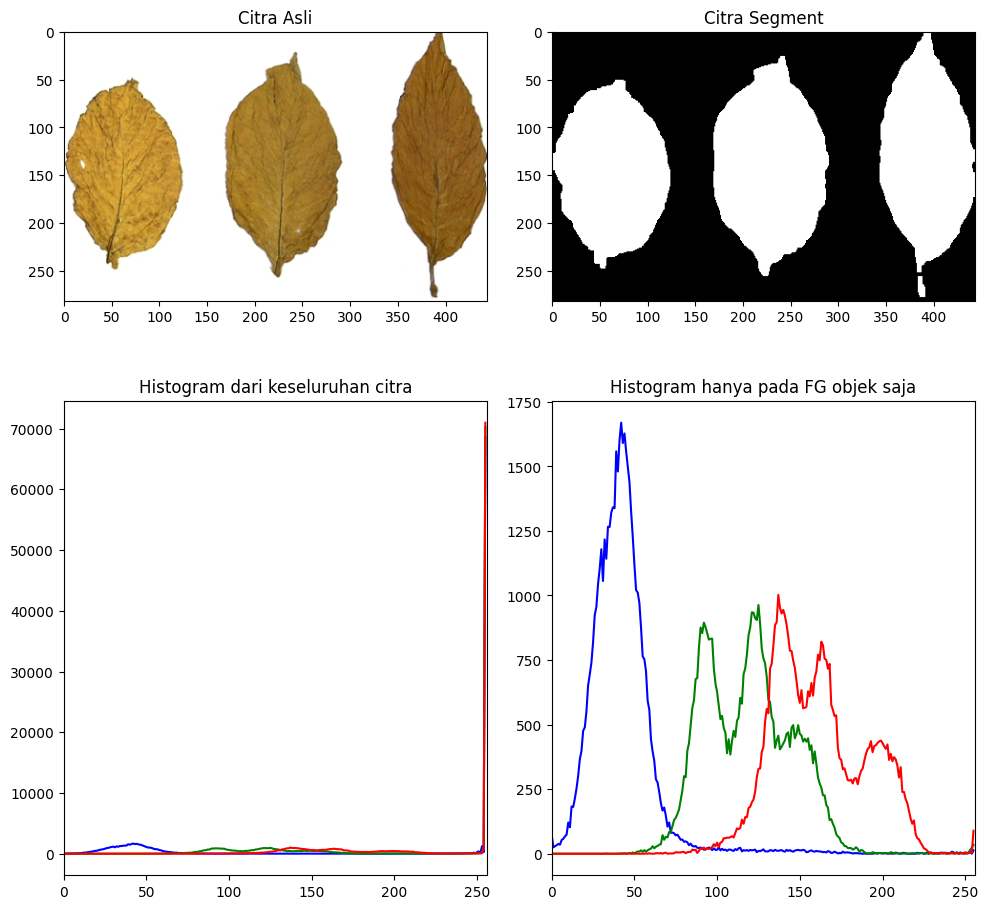

In [6]:
# Load image
image = cv2.imread('/content/drive/MyDrive/PCVK/tobacco.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Menerapkan binary thresholding untuk membuat masking segmentation
_, mask = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Menerapkan operasi morfologi untuk membersihkan masking
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Menghitung histogram untuk keseluruhan gambar (untuk setiap saluran warna)
hist_full_image = []
colors = ('b', 'g', 'r')
for i, color in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    hist_full_image.append(hist)

# Membuat Plot original image
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')

# Membuat Plot segmented image (mask)
plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Segment')

# Membuat Plot histograms untuk setiap saluran dalam gambar penuh
plt.subplot(2, 2, 3)
for hist, color in zip(hist_full_image, colors):
    plt.plot(hist, color=color)
plt.title('Histogram dari keseluruhan citra')
plt.xlim([0, 256])

# Menghitung dan plot histogram untuk gambar masking (foreground)
hist_masked_image = []
for i, color in enumerate(colors):
    hist = cv2.calcHist([image], [i], mask, [256], [0, 256])
    hist_masked_image.append(hist)

plt.subplot(2, 2, 4)
for hist, color in zip(hist_masked_image, colors):
    plt.plot(hist, color=color)
plt.title('Histogram hanya pada FG objek saja')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

### 6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja).

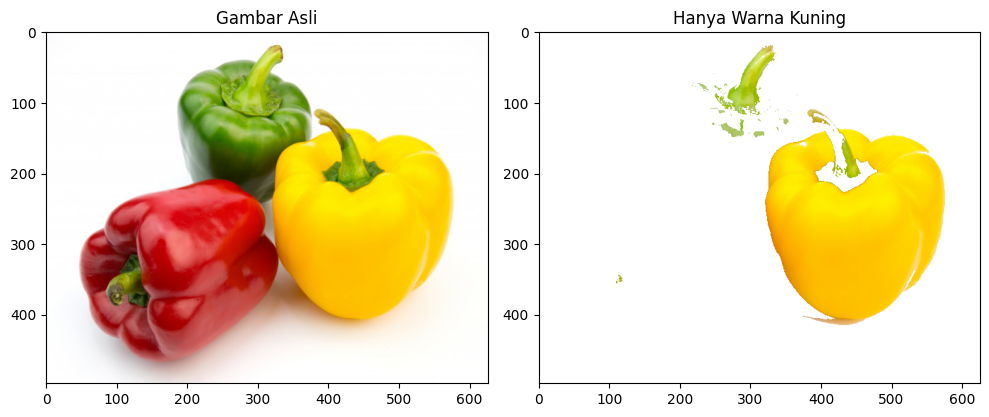

In [13]:
# Load the image
img = cv2.imread('/content/drive/MyDrive/PCVK/peppers.jpg')

# Mengubah citra menjadi dua dimensi untuk K-Means clustering
Z = img.reshape((-1, 3))
Z = np.float32(Z)

# K-Means clustering
K = 3
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Mengubah hasil klaster menjadi format gambar
centers = np.uint8(centers)
segmented_img = centers[labels.flatten()]
segmented_img = segmented_img.reshape(img.shape)

# Menentukan rentang warna kuning dalam format BGR
lower_yellow = np.array([0, 180, 180])
upper_yellow = np.array([50, 255, 255])

# Masking: pilih hanya area yang sesuai dengan warna kuning
mask = cv2.inRange(segmented_img, lower_yellow, upper_yellow)
result = cv2.bitwise_and(img, img, mask=mask)

# Membuat bagian yang bukan warna kuning menjadi putih
result = img.copy()
result[mask == 0] = [255]

# Menampilkan gambar asli, gambar segmentasi dan hasil masking
plt.figure(figsize=(10,10))

# Gambar Asli
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')

# Gambar Hanya Warna Kuning
plt.subplot(122)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Hanya Warna Kuning')

plt.tight_layout()
plt.show()

#### Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa hal itu terjadi?

#### Jawaban:
> * Batas bawah dan atas untuk warna kuning kadang tidak akurat, sehingga ada area kuning yang tidak terdeteksi.
Kualitas gambar dan noise: Noise dalam gambar dapat memengaruhi hasil klastering, sehingga menyulitkan deteksi warna yang diinginkan.
> * Pemilihan jumlah klaster (K) yang tidak tepat, baik terlalu sedikit atau terlalu banyak, dapat menyebabkan hasil segmentasi menjadi kurang akurat.
> * Setelah segmentasi, beberapa bagian mungkin tetap muncul sebagai noise, terutama jika terdapat gradasi warna atau warna yang hampir serupa di area yang ingin dipisahkan.


### 7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code dan hasil image di modul ini.

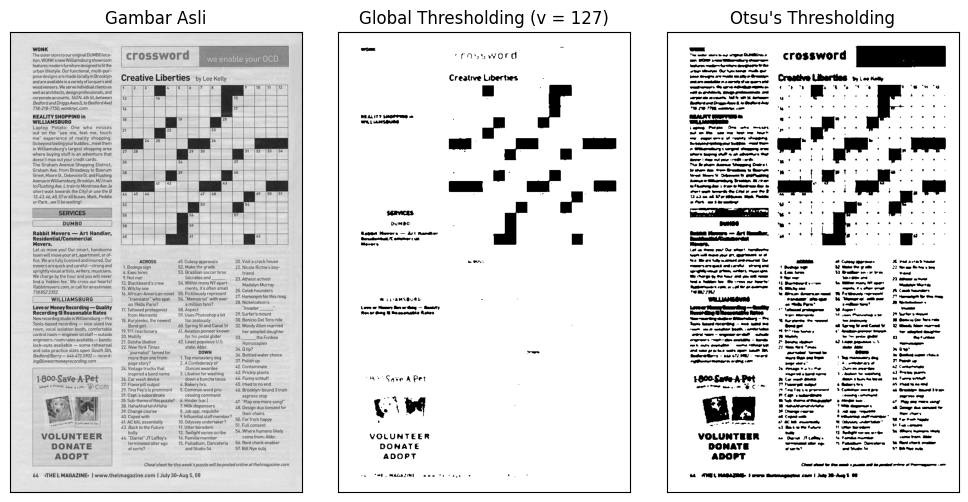

Nilai threshold yang dipilih oleh Otsu's Method: 171.0


In [9]:
filename = '/content/drive/MyDrive/PCVK/crossword.jpg'
img = cv2.imread(filename, 0)

# Gaussian blur untuk mengurangi noise
blur = cv2.GaussianBlur(img, (5, 5), 0)

# Global Thresholding
thresh_value = 127  # Threshold global ditentukan secara manual
ret1, th1 = cv2.threshold(blur, thresh_value, 255, cv2.THRESH_BINARY)

# Otsu's Thresholding (tanpa menentukan threshold manual)
ret2, th2 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Menampilkan hasil
titles = ['Gambar Asli', 'Global Thresholding (v = 127)', "Otsu's Thresholding"]
images = [img, th1, th2]

plt.figure(figsize=(10,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

# Mencetak nilai threshold Otsu yang dipilih secara otomatis
print(f"Nilai threshold yang dipilih oleh Otsu's Method: {ret2}")